In [1]:
%matplotlib inline
from IPython.display import display
import matplotlib as mpl
import matplotlib.pyplot as plt 
import numpy as np
import os
import pandas as pd

plt.rcParams['figure.figsize'] = (10.0, 8.0)

In [2]:
def load(filename):
    x = pd.read_csv(os.path.join('../data/jhu/csse_covid_19_data/', filename))
    x = x.drop(columns=['Lat', 'Long']).set_index(['Country/Region', 'Province/State']).T
    x.index = pd.to_datetime(x.index, dayfirst=False)
    x.index.name = 'Date'
    return x.groupby(axis='columns', level='Country/Region').sum()
confirmed = load('csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
recovered = load('csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
deaths = load('csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [3]:
MIN_DEATHS = 1000

'2020-05-12'

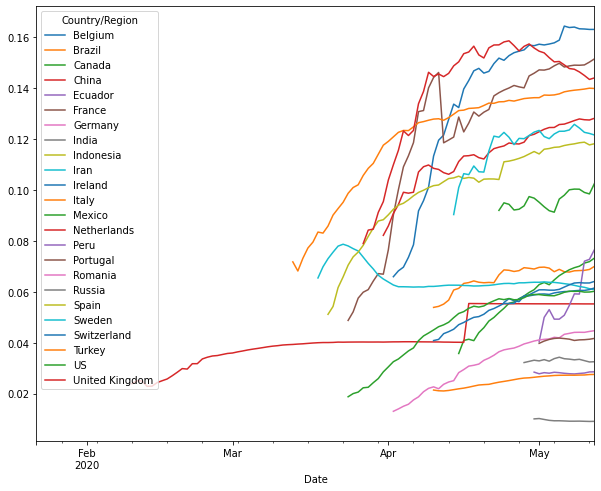

In [4]:
lower_bound = (deaths.where(deaths > MIN_DEATHS) / confirmed).dropna(axis='columns', how='all')
display(lower_bound.index[-1].strftime('%Y-%m-%d'))
lower_bound.plot(legend='best')


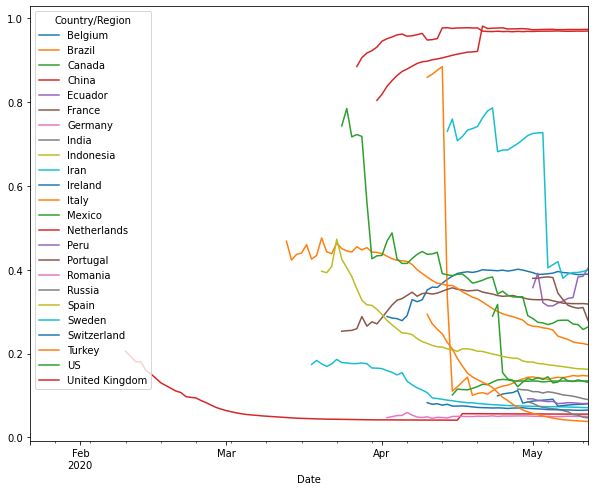

In [5]:
upper_bound = (deaths.where(deaths > MIN_DEATHS) / (deaths + recovered)).dropna(axis='columns', how='all')
upper_bound = np.minimum(upper_bound, 1.0)
upper_bound.plot(legend='best')


In [6]:
(pd.DataFrame({'lower_bound': lower_bound.iloc[-1],
              'upper_bound': upper_bound.iloc[-1]})
 .sort_values(by='lower_bound', ascending=False)
 .style.format(lambda x: '{:.1f}%'.format(100 * x)))


,lower_bound,upper_bound
Country/Region,,
Belgium,16.3%,38.9%
France,15.1%,31.8%
United Kingdom,14.4%,97.0%
Italy,14.0%,22.1%
Netherlands,12.8%,97.4%
Sweden,12.1%,40.0%
Spain,11.8%,16.2%
Mexico,10.2%,13.1%
Ecuador,7.6%,40.4%


/home/drake/.virtualenvs/covid-19/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


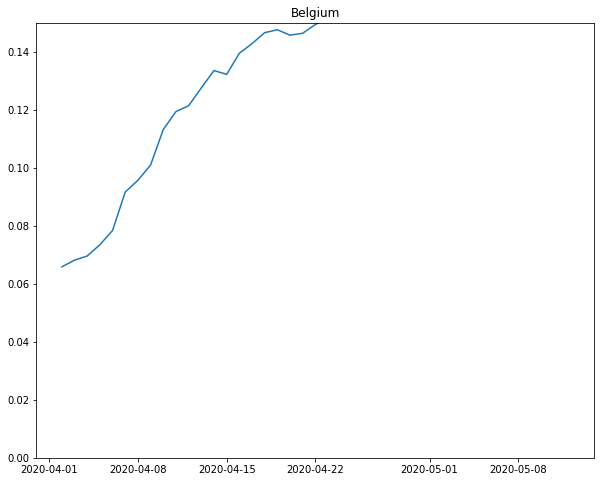

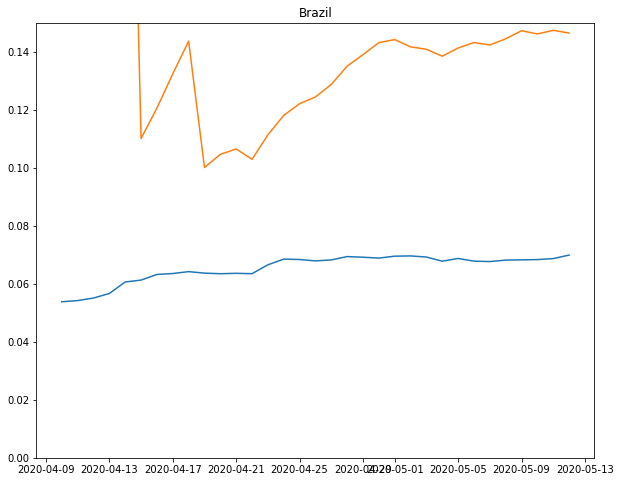

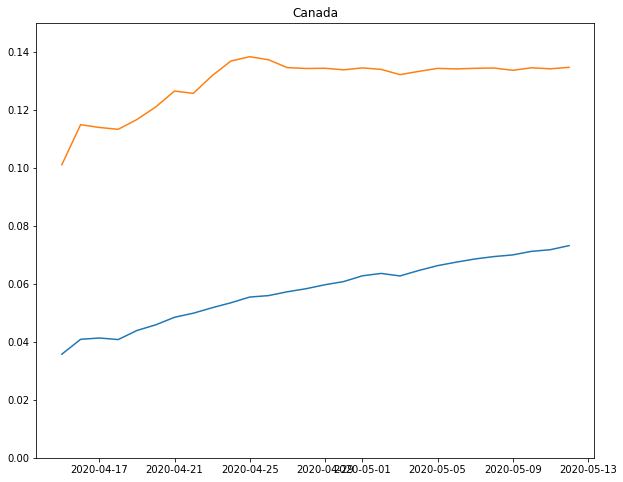

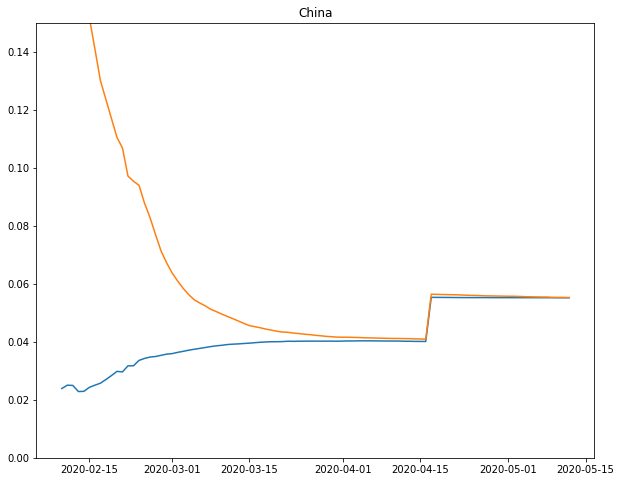

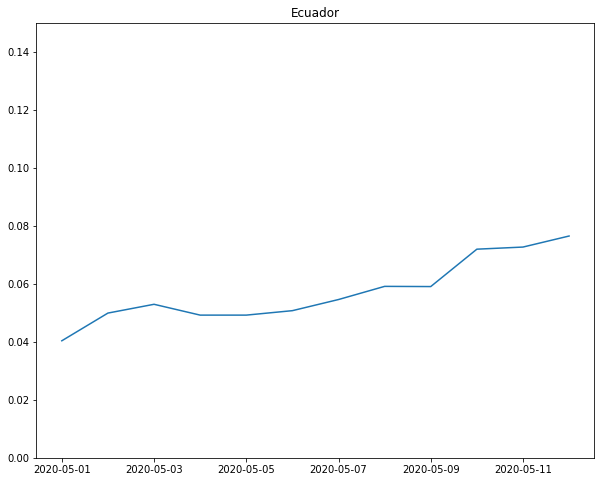

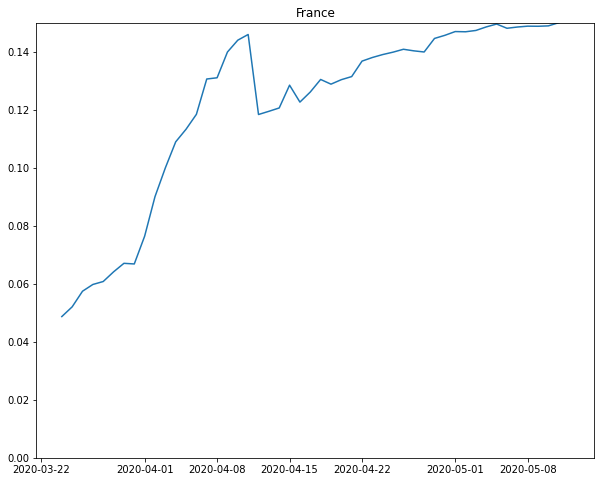

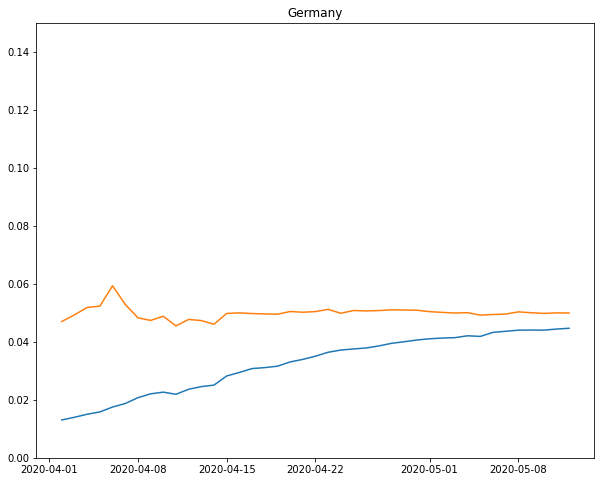

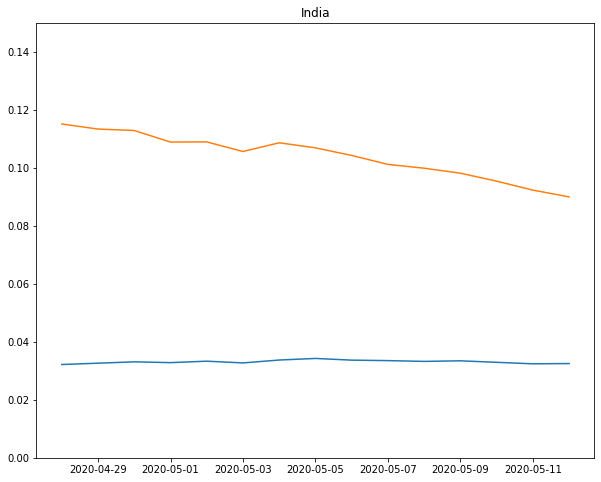

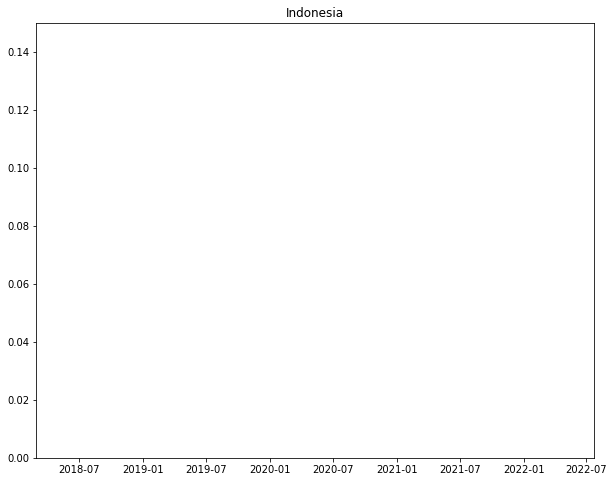

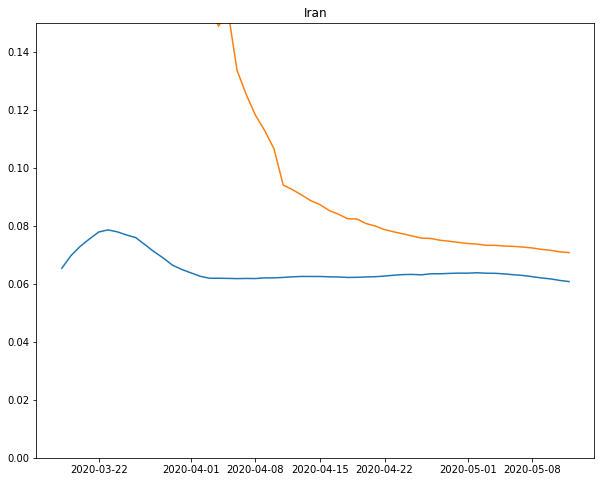

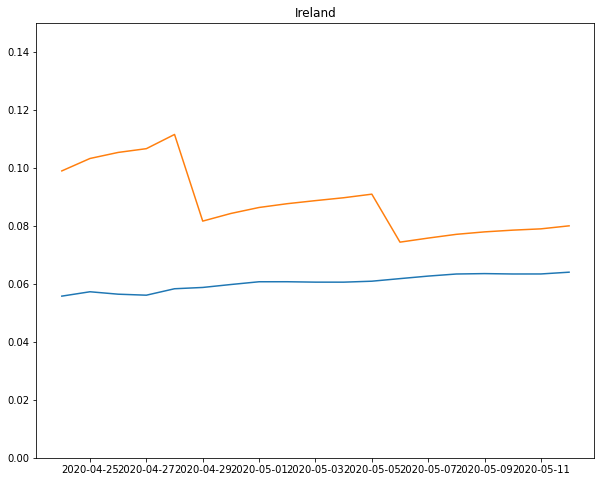

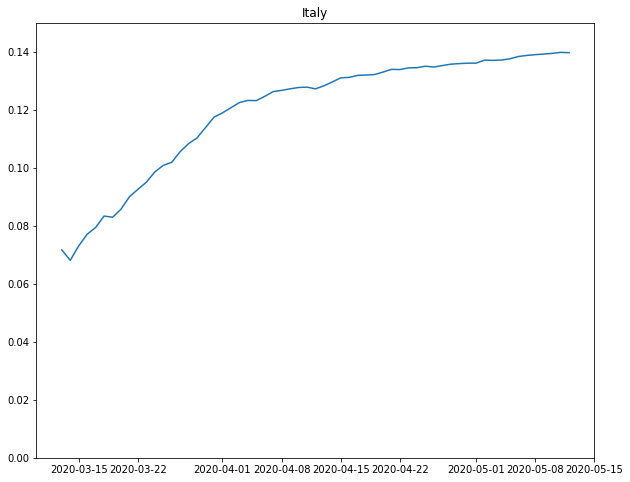

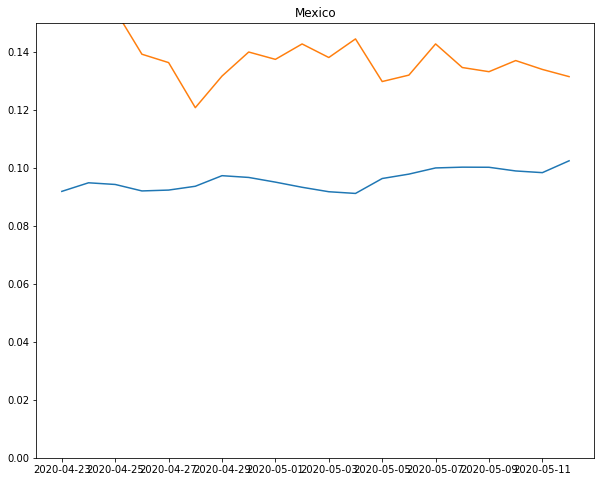

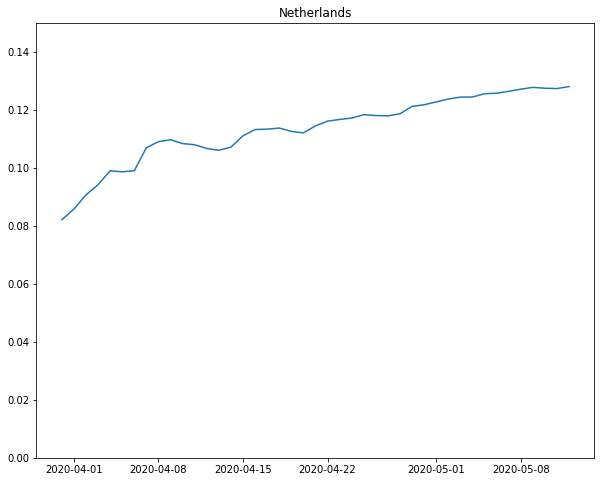

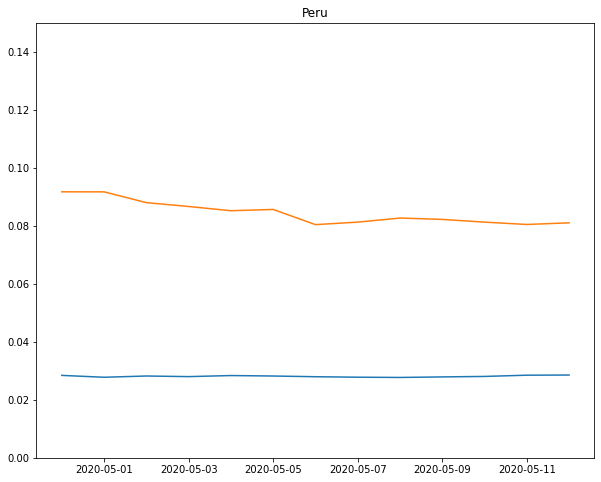

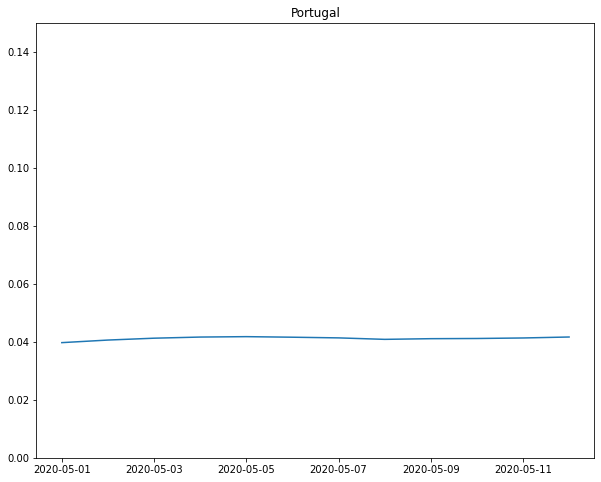

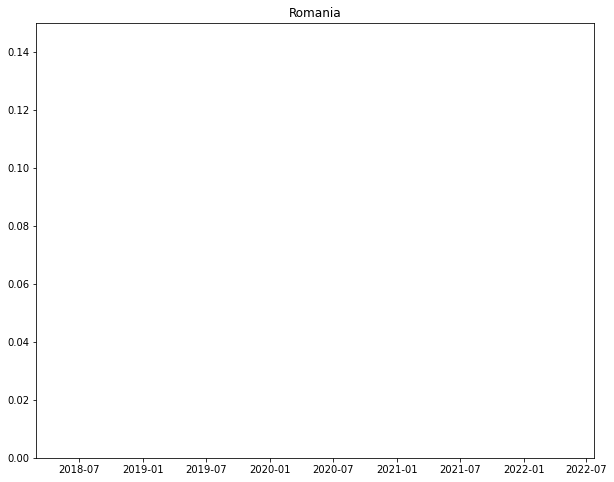

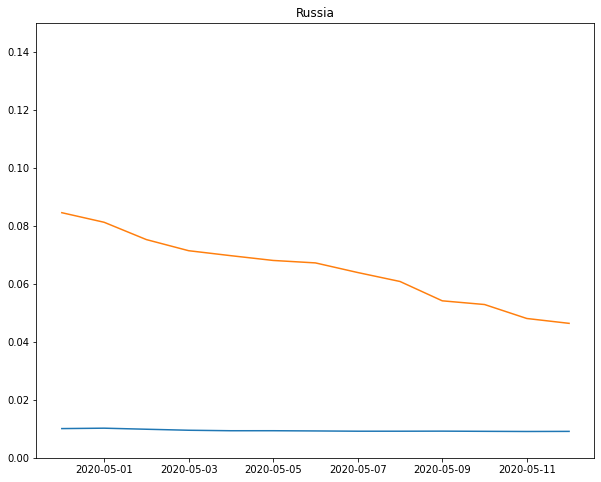

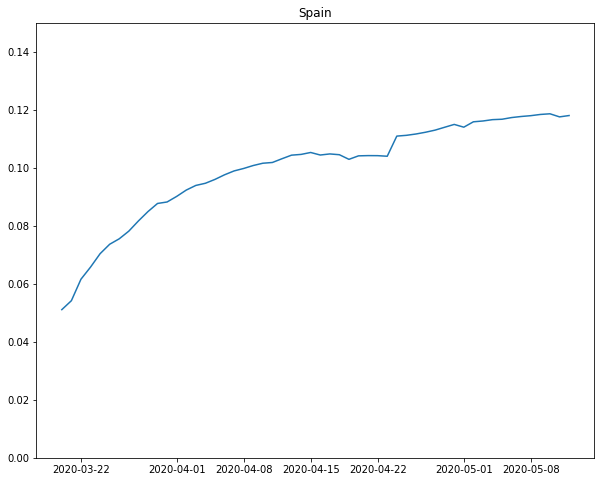

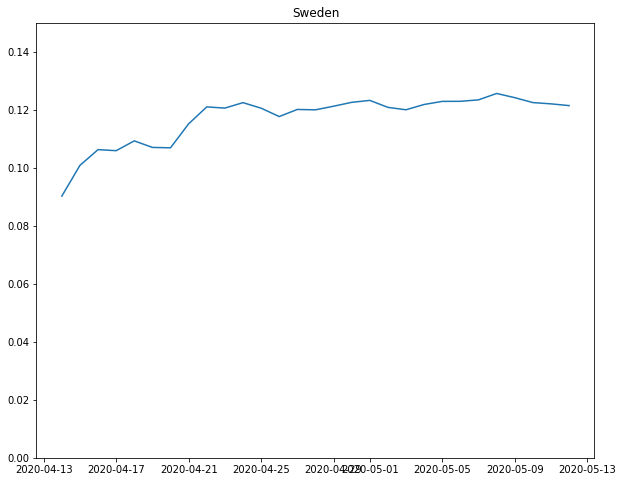

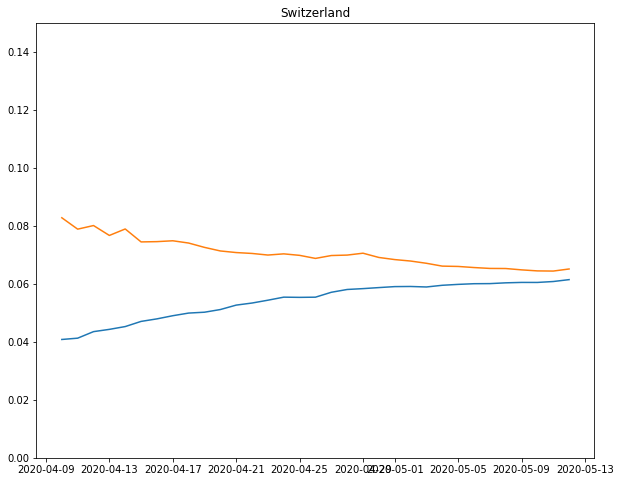

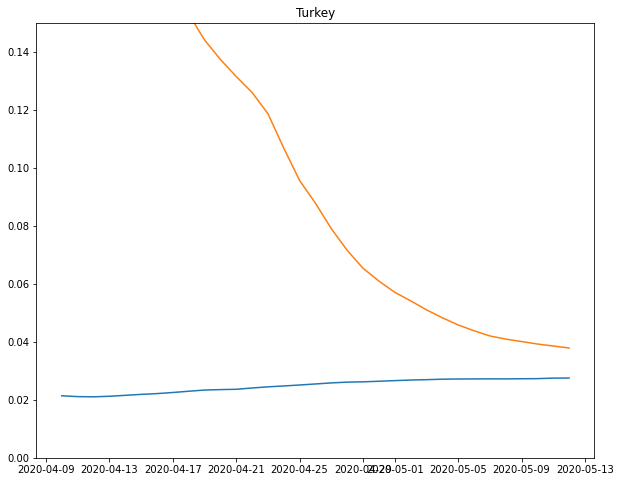

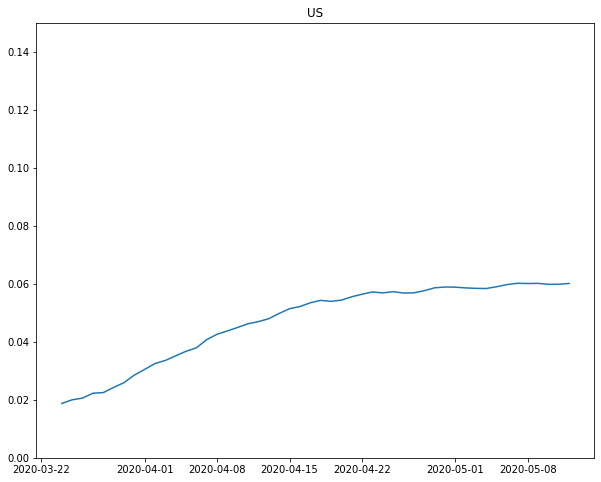

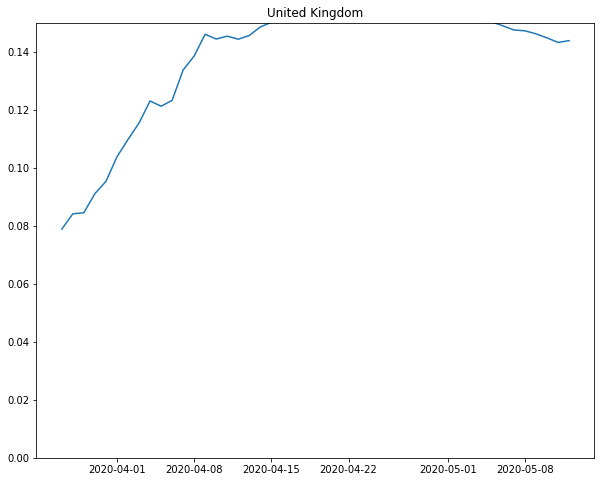

In [7]:
for idx, col in lower_bound.iteritems():
    plt.figure(str(idx))
    plt.plot(pd.DataFrame({'lower':col, 'upper':upper_bound.loc[:,idx]}))
    plt.title(idx)
    plt.ylim(0, 0.15)

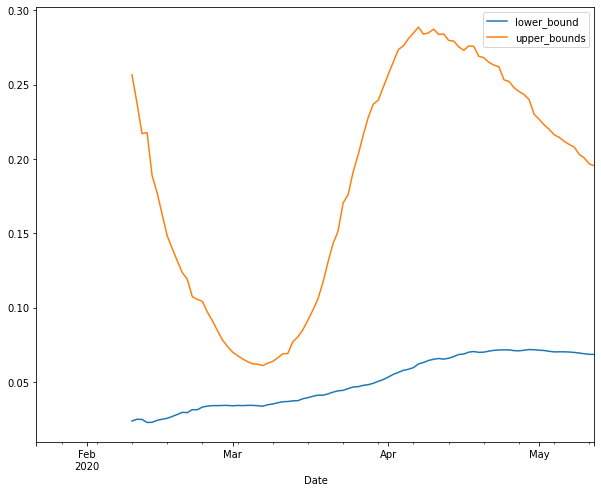

In [8]:
all_deaths = deaths.sum(axis='columns')
all_deaths = all_deaths.where(all_deaths > MIN_DEATHS)
all_confirmed = confirmed.sum(axis='columns')
all_recovered = recovered.sum(axis='columns')
all_recovered = all_recovered.where(all_recovered > MIN_DEATHS)
pd.DataFrame({'lower_bound': all_deaths / all_confirmed,
              'upper_bounds': all_deaths / all_recovered}).plot()

